# Лабораторна робота №7
### Студента групи МІТ-31
### Переверзева Олексія

Розархівуємо набір даних

In [27]:
import zipfile
import os

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()
main_dir="10_food_classes_all_data"

food_list = os.listdir("10_food_classes_all_data/train")
food_list.sort()
print(food_list)

# Папки та архів додано у gitignore

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


#### 1. Вибір Класів

In [28]:
# Оберемо 3 класи

classes=['hamburger', 'pizza', 'steak']

#### 2. Попередня Обробка

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Створимо генератори для тестового та тренувального набору даних
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% даних для валідації
)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [30]:
# Директорії тренувальних та тестових наборів
train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Імпортуємо дані з каталогів і перетворіть їх на партії

#Тренувальний набір
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # К-ть зображень для обробки одночасно
                                               target_size=(224, 224), # Перетворіимо усі зображення в 224 х 224
                                               class_mode="categorical",
                                               subset='training',
                                               classes=classes,
                                               seed=13)

# Валідаційний набір
valid_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               subset='validation',
                                               classes=classes,
                                               seed=13)

# Тестовий набір
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               classes=classes,
                                               seed=13)

Found 1800 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


#### 3. Розробка та Тренування Моделей

In [31]:
from tensorflow .keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Компілюємо модель
model_1.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

# Тренуємо модель
results_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
57/57 [==============================] - 48s 831ms/step - loss: 1.1793 - accuracy: 0.4139 - val_loss: 0.9951 - val_accuracy: 0.5444
Epoch 2/10
57/57 [==============================] - 34s 597ms/step - loss: 0.9368 - accuracy: 0.5567 - val_loss: 0.8913 - val_accuracy: 0.5756
Epoch 3/10
57/57 [==============================] - 39s 686ms/step - loss: 0.8550 - accuracy: 0.5983 - val_loss: 0.8845 - val_accuracy: 0.6044
Epoch 4/10
57/57 [==============================] - 36s 637ms/step - loss: 0.7819 - accuracy: 0.6539 - val_loss: 0.8624 - val_accuracy: 0.5911
Epoch 5/10
57/57 [==============================] - 46s 808ms/step - loss: 0.7530 - accuracy: 0.6611 - val_loss: 0.8453 - val_accuracy: 0.6133
Epoch 6/10
57/57 [==============================] - 40s 703ms/step - loss: 0.7146 - accuracy: 0.6878 - val_loss: 0.8396 - val_accuracy: 0.6222
Epoch 7/10
57/57 [==============================] - 41s 702ms/step - loss: 0.6509 - accuracy: 0.7161 - val_loss: 0.7781 - val_accuracy: 0.6933

In [33]:
model_2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model_2.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

results_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
57/57 [==============================] - 41s 706ms/step - loss: 1.1495 - accuracy: 0.4533 - val_loss: 0.9135 - val_accuracy: 0.5511
Epoch 2/10
57/57 [==============================] - 37s 636ms/step - loss: 0.8726 - accuracy: 0.5894 - val_loss: 0.8821 - val_accuracy: 0.5733
Epoch 3/10
57/57 [==============================] - 47s 829ms/step - loss: 0.8330 - accuracy: 0.6200 - val_loss: 0.8480 - val_accuracy: 0.6289
Epoch 4/10
57/57 [==============================] - 38s 661ms/step - loss: 0.7645 - accuracy: 0.6722 - val_loss: 0.9494 - val_accuracy: 0.6222
Epoch 5/10
57/57 [==============================] - 36s 638ms/step - loss: 0.7548 - accuracy: 0.6728 - val_loss: 0.7917 - val_accuracy: 0.6222
Epoch 6/10
57/57 [==============================] - 36s 638ms/step - loss: 0.7060 - accuracy: 0.6983 - val_loss: 0.8103 - val_accuracy: 0.6333
Epoch 7/10
57/57 [==============================] - 37s 649ms/step - loss: 0.6792 - accuracy: 0.7167 - val_loss: 0.7743 - val_accuracy: 0.6756

In [34]:
model_3 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model_3.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

results_3 = model_3.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
57/57 [==============================] - 55s 944ms/step - loss: 1.0851 - accuracy: 0.3794 - val_loss: 1.0502 - val_accuracy: 0.4244
Epoch 2/10
57/57 [==============================] - 55s 968ms/step - loss: 0.9739 - accuracy: 0.5133 - val_loss: 0.9913 - val_accuracy: 0.5356
Epoch 3/10
57/57 [==============================] - 57s 1s/step - loss: 0.8848 - accuracy: 0.5944 - val_loss: 0.9573 - val_accuracy: 0.5378
Epoch 4/10
57/57 [==============================] - 56s 982ms/step - loss: 0.8924 - accuracy: 0.5733 - val_loss: 0.8808 - val_accuracy: 0.6200
Epoch 5/10
57/57 [==============================] - 52s 917ms/step - loss: 0.8340 - accuracy: 0.6150 - val_loss: 0.8375 - val_accuracy: 0.6400
Epoch 6/10
57/57 [==============================] - 53s 934ms/step - loss: 0.8106 - accuracy: 0.6356 - val_loss: 0.8537 - val_accuracy: 0.6244
Epoch 7/10
57/57 [==============================] - 53s 923ms/step - loss: 0.8326 - accuracy: 0.6283 - val_loss: 0.8319 - val_accuracy: 0.6600
Ep

#### 4. Оцінка Моделей

Оцінка моделі 1: 
24/24 [==============================] - 8s 351ms/step - loss: 0.5670 - accuracy: 0.7720


<Axes: title={'center': 'Історія моделі 1'}, xlabel='Епохи', ylabel='Втрати/Точність'>

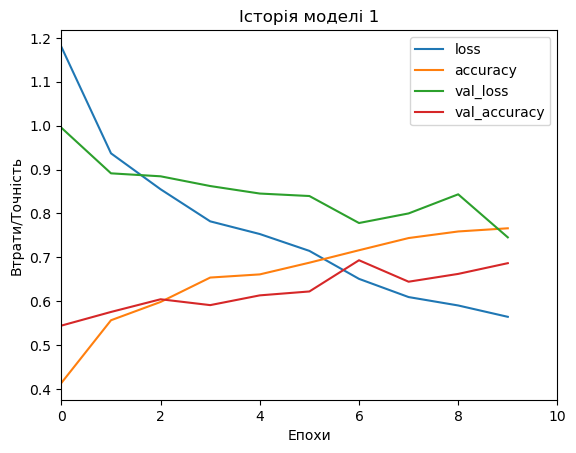

In [35]:
print("Оцінка моделі 1: ")
test_loss, test_accuracy= model_1.evaluate(test_data)

import pandas as pd
pd.DataFrame(results_1.history).plot(xlabel="Епохи",
ylabel="Втрати/Точність",title="Історія моделі 1", xlim=(0,10))

Оцінка моделі 2: 
24/24 [==============================] - 4s 149ms/step - loss: 0.6663 - accuracy: 0.7253


<Axes: title={'center': 'Історія моделі 2'}, xlabel='Епохи', ylabel='Втрати/Точність'>

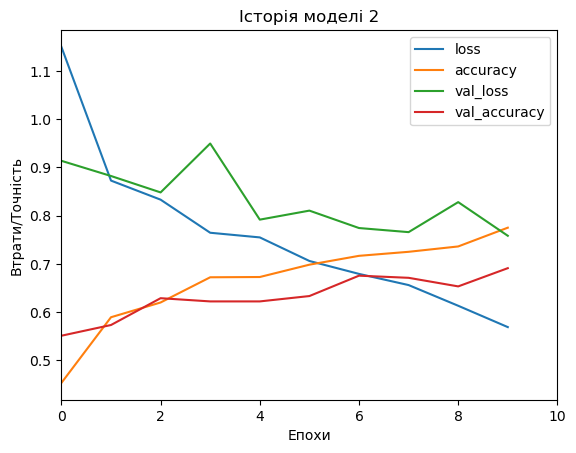

In [36]:
print("Оцінка моделі 2: ")
test_loss, test_accuracy= model_2.evaluate(test_data)

import pandas as pd
pd.DataFrame(results_2.history).plot(xlabel="Епохи",
ylabel="Втрати/Точність",title="Історія моделі 2", xlim=(0,10))

Оцінка моделі 3: 
24/24 [==============================] - 5s 202ms/step - loss: 0.8216 - accuracy: 0.6467


<Axes: title={'center': 'Історія моделі 3'}, xlabel='Епохи', ylabel='Втрати/Точність'>

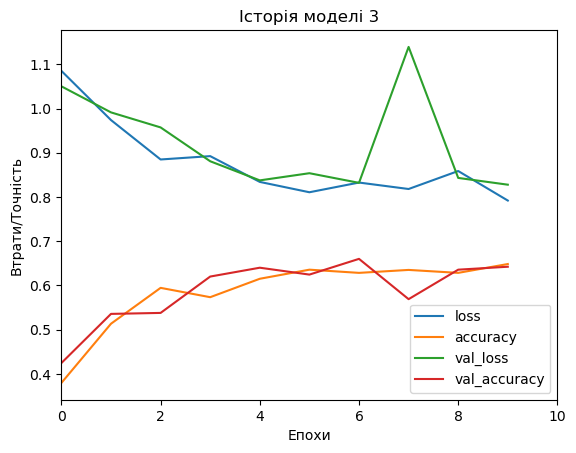

In [37]:
print("Оцінка моделі 3: ")
test_loss, test_accuracy= model_3.evaluate(test_data)

import pandas as pd
pd.DataFrame(results_3.history).plot(xlabel="Епохи",
ylabel="Втрати/Точність",title="Історія моделі 3", xlim=(0,10))

#### 5. Transfer learning з використанням EfficientNet

In [41]:
import tensorflow_hub as hub

url_efficientnet = "https://tfhub.dev/tensorflow/efficientnet/b3/classification/1"

model_en = Sequential([
    hub.KerasLayer(url_efficientnet, trainable=False),
    Dense(3, activation='softmax')
])
model_en.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

results_en = model_en.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
57/57 [==============================] - 86s 1s/step - loss: 1.0757 - accuracy: 0.6894 - val_loss: 1.0557 - val_accuracy: 0.8467
Epoch 2/5
57/57 [==============================] - 72s 1s/step - loss: 1.0387 - accuracy: 0.8750 - val_loss: 1.0185 - val_accuracy: 0.8844
Epoch 3/5
57/57 [==============================] - 71s 1s/step - loss: 1.0027 - accuracy: 0.8822 - val_loss: 0.9832 - val_accuracy: 0.8911
Epoch 4/5
57/57 [==============================] - 80s 1s/step - loss: 0.9680 - accuracy: 0.8878 - val_loss: 0.9493 - val_accuracy: 0.8822
Epoch 5/5
57/57 [==============================] - 84s 1s/step - loss: 0.9374 - accuracy: 0.8822 - val_loss: 0.9160 - val_accuracy: 0.8756


Оцінка моделі EfficientNet: 
24/24 [==============================] - 25s 1s/step - loss: 0.8861 - accuracy: 0.9467


<Axes: title={'center': 'Історія моделі EfficientNet'}, xlabel='Епохи', ylabel='Втрати/Точність'>

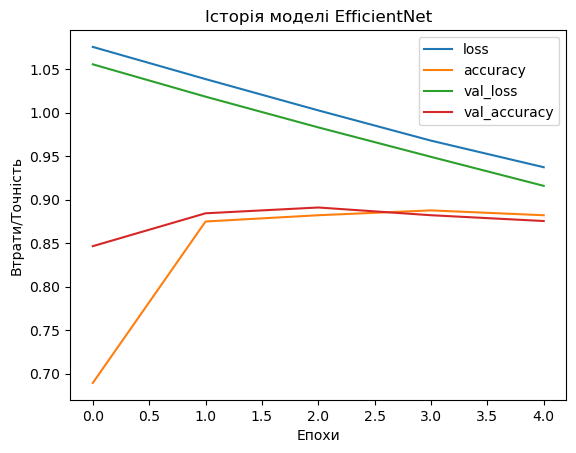

In [44]:
print("Оцінка моделі EfficientNet: ")
test_loss, test_accuracy= model_en.evaluate(test_data)

import pandas as pd
pd.DataFrame(results_en.history).plot(xlabel="Епохи",
ylabel="Втрати/Точність",title="Історія моделі EfficientNet")